## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.649747  1.479100  1.675579 -0.741411  0.894212 -0.684301
1 -0.486860 -0.607885 -1.564070  0.844944  1.562583  1.240929
2  0.206102 -1.209863  1.764119 -1.154957 -0.958910 -0.965846
3 -0.391532 -1.099079  1.378982  0.423740  1.230056  0.099894
4  1.407980 -1.191469 -0.550286 -1.098912 -0.149146 -1.040594


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9975237	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9862923	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9768360	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9672582	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9580553	total: 60ms	remaining: 11.9s
5:	learn: 0.9468243	total: 60.5ms	remaining: 10s
6:	learn: 0.9358871	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9271119	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9181865	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9085355	total: 62.6ms	remaining: 6.2s
10:	learn: 0.9006640	total: 63ms	remaining: 5.67s
11:	learn: 0.8922849	total: 63.5ms	remaining: 5.22s
12:	learn: 0.8821649	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8743150	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8674391	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8594080	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8511100	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8424711	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8338812	total: 66.7ms	remaining: 3.44s

106:	learn: 0.3816020	total: 107ms	remaining: 890ms
107:	learn: 0.3788169	total: 107ms	remaining: 886ms
108:	learn: 0.3763800	total: 108ms	remaining: 880ms
109:	learn: 0.3733462	total: 108ms	remaining: 876ms
110:	learn: 0.3702689	total: 109ms	remaining: 869ms
111:	learn: 0.3671844	total: 109ms	remaining: 864ms
112:	learn: 0.3641897	total: 109ms	remaining: 859ms
113:	learn: 0.3612997	total: 110ms	remaining: 854ms
114:	learn: 0.3583728	total: 110ms	remaining: 849ms
115:	learn: 0.3554414	total: 111ms	remaining: 844ms
116:	learn: 0.3522177	total: 111ms	remaining: 839ms
117:	learn: 0.3496873	total: 112ms	remaining: 835ms
118:	learn: 0.3471396	total: 112ms	remaining: 830ms
119:	learn: 0.3445207	total: 113ms	remaining: 825ms
120:	learn: 0.3421339	total: 113ms	remaining: 821ms
121:	learn: 0.3394519	total: 114ms	remaining: 817ms
122:	learn: 0.3369476	total: 114ms	remaining: 812ms
123:	learn: 0.3342395	total: 114ms	remaining: 808ms
124:	learn: 0.3312939	total: 115ms	remaining: 805ms
125:	learn: 

273:	learn: 0.1322444	total: 186ms	remaining: 494ms
274:	learn: 0.1317547	total: 187ms	remaining: 493ms
275:	learn: 0.1311465	total: 188ms	remaining: 492ms
276:	learn: 0.1304972	total: 188ms	remaining: 491ms
277:	learn: 0.1296714	total: 188ms	remaining: 489ms
278:	learn: 0.1292021	total: 189ms	remaining: 488ms
279:	learn: 0.1281755	total: 189ms	remaining: 487ms
280:	learn: 0.1274862	total: 190ms	remaining: 486ms
281:	learn: 0.1269749	total: 190ms	remaining: 484ms
282:	learn: 0.1259815	total: 191ms	remaining: 483ms
283:	learn: 0.1251116	total: 191ms	remaining: 482ms
284:	learn: 0.1245818	total: 191ms	remaining: 480ms
285:	learn: 0.1238440	total: 192ms	remaining: 479ms
286:	learn: 0.1234335	total: 192ms	remaining: 478ms
287:	learn: 0.1226141	total: 193ms	remaining: 477ms
288:	learn: 0.1218795	total: 193ms	remaining: 475ms
289:	learn: 0.1214186	total: 194ms	remaining: 474ms
290:	learn: 0.1208081	total: 194ms	remaining: 473ms
291:	learn: 0.1201839	total: 195ms	remaining: 472ms
292:	learn: 

497:	learn: 0.0494843	total: 291ms	remaining: 293ms
498:	learn: 0.0492773	total: 291ms	remaining: 292ms
499:	learn: 0.0489341	total: 292ms	remaining: 292ms
500:	learn: 0.0488557	total: 292ms	remaining: 291ms
501:	learn: 0.0485256	total: 293ms	remaining: 290ms
502:	learn: 0.0484235	total: 293ms	remaining: 290ms
503:	learn: 0.0480907	total: 293ms	remaining: 289ms
504:	learn: 0.0479914	total: 294ms	remaining: 288ms
505:	learn: 0.0476718	total: 294ms	remaining: 287ms
506:	learn: 0.0474739	total: 295ms	remaining: 287ms
507:	learn: 0.0471576	total: 295ms	remaining: 286ms
508:	learn: 0.0470617	total: 296ms	remaining: 285ms
509:	learn: 0.0469876	total: 296ms	remaining: 285ms
510:	learn: 0.0467535	total: 297ms	remaining: 284ms
511:	learn: 0.0465620	total: 297ms	remaining: 283ms
512:	learn: 0.0462959	total: 298ms	remaining: 283ms
513:	learn: 0.0462038	total: 298ms	remaining: 282ms
514:	learn: 0.0459523	total: 300ms	remaining: 282ms
515:	learn: 0.0458625	total: 300ms	remaining: 281ms
516:	learn: 

659:	learn: 0.0253904	total: 370ms	remaining: 191ms
660:	learn: 0.0252886	total: 371ms	remaining: 190ms
661:	learn: 0.0252284	total: 371ms	remaining: 190ms
662:	learn: 0.0251634	total: 372ms	remaining: 189ms
663:	learn: 0.0250460	total: 372ms	remaining: 188ms
664:	learn: 0.0250129	total: 372ms	remaining: 188ms
665:	learn: 0.0249409	total: 373ms	remaining: 187ms
666:	learn: 0.0248976	total: 373ms	remaining: 186ms
667:	learn: 0.0248653	total: 374ms	remaining: 186ms
668:	learn: 0.0247316	total: 374ms	remaining: 185ms
669:	learn: 0.0246609	total: 375ms	remaining: 185ms
670:	learn: 0.0245914	total: 375ms	remaining: 184ms
671:	learn: 0.0245490	total: 376ms	remaining: 183ms
672:	learn: 0.0244353	total: 376ms	remaining: 183ms
673:	learn: 0.0244037	total: 377ms	remaining: 182ms
674:	learn: 0.0243352	total: 377ms	remaining: 182ms
675:	learn: 0.0242798	total: 377ms	remaining: 181ms
676:	learn: 0.0242252	total: 378ms	remaining: 180ms
677:	learn: 0.0241944	total: 378ms	remaining: 180ms
678:	learn: 

875:	learn: 0.0119777	total: 474ms	remaining: 67.1ms
876:	learn: 0.0119439	total: 475ms	remaining: 66.6ms
877:	learn: 0.0119081	total: 475ms	remaining: 66.1ms
878:	learn: 0.0118525	total: 476ms	remaining: 65.5ms
879:	learn: 0.0118113	total: 476ms	remaining: 65ms
880:	learn: 0.0117791	total: 477ms	remaining: 64.4ms
881:	learn: 0.0117388	total: 477ms	remaining: 63.8ms
882:	learn: 0.0117072	total: 478ms	remaining: 63.3ms
883:	learn: 0.0116576	total: 478ms	remaining: 62.7ms
884:	learn: 0.0116268	total: 479ms	remaining: 62.2ms
885:	learn: 0.0115738	total: 479ms	remaining: 61.6ms
886:	learn: 0.0115350	total: 480ms	remaining: 61.1ms
887:	learn: 0.0115050	total: 480ms	remaining: 60.5ms
888:	learn: 0.0114676	total: 480ms	remaining: 60ms
889:	learn: 0.0114356	total: 481ms	remaining: 59.4ms
890:	learn: 0.0113883	total: 481ms	remaining: 58.9ms
891:	learn: 0.0113519	total: 482ms	remaining: 58.3ms
892:	learn: 0.0113059	total: 482ms	remaining: 57.8ms
893:	learn: 0.0112651	total: 483ms	remaining: 57.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

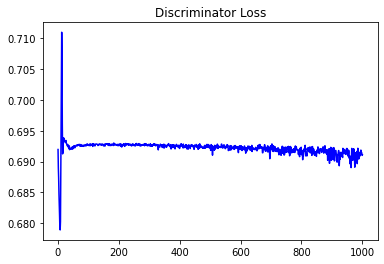

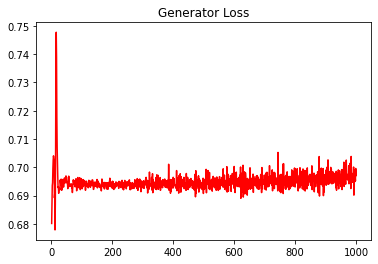

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16077418216660452


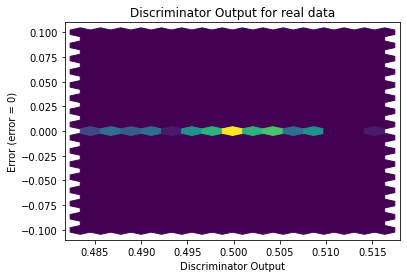

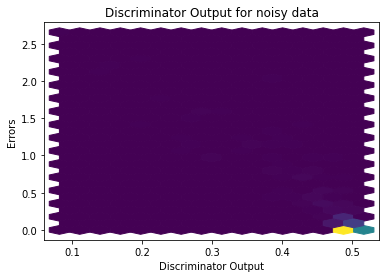

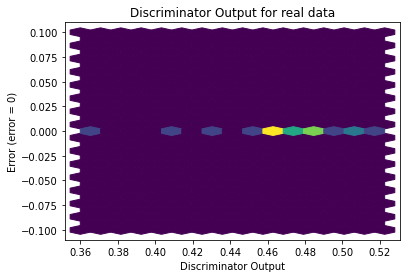

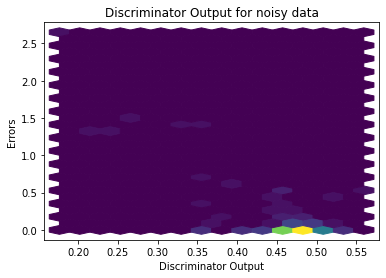

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


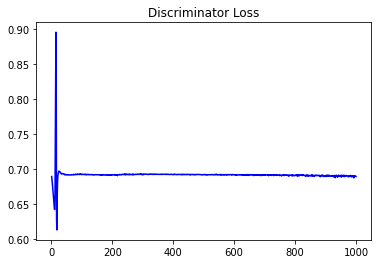

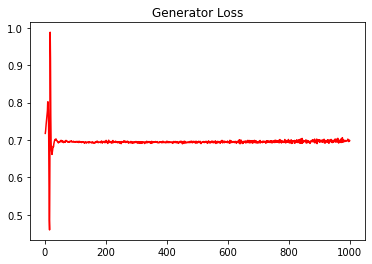

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1921887523236148


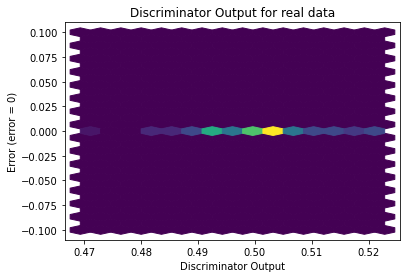

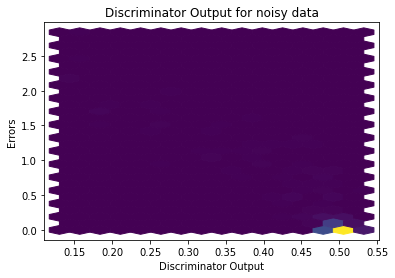

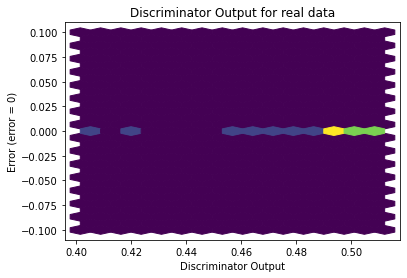

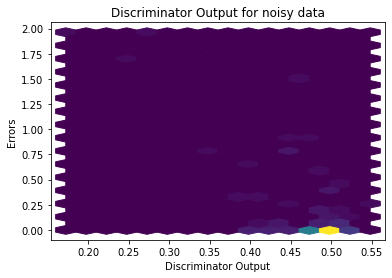

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0695]], requires_grad=True)
